In [117]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plotter

df = pd.read_csv("police_blotter.csv", sep=',')
df.head(10)

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,306530435,23035798,6,2023-03-10T11:30:00,"600 Block Penn Ave Pittsburgh, PA 15222",N,Central Business District,2,THEFT,3921 Theft by Unlawful Taking or Disposition.,201.0,6.0,6.0,-80.001793,40.442593
1,307051774,23038735,10,2023-03-16T09:35:00,"800 Block Reunion Pl Pittsburgh, PA 15219",N,Bedford Dwellings,2,TERRORISTIC THREATS,2706 Terroristic Threats. / 2709(a) Harassment.,509.0,NaN,NaN,NaN,NaN
2,307082554,23038816,27,2023-03-16T12:45:00,"N Braddock Ave & Alsace Way Pittsburgh, PA 15208",N,Homewood South,5,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1303.0,9.0,2.0,-79.891415,40.452384
3,307106971,23038916,99,2023-03-16T12:00:00,"1400 Block Locust St Pittsburgh, PA 15219",N,Bluff,2,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),103.0,6.0,3.0,-79.985459,40.436044
4,307112015,23038967,6,2023-03-16T17:54:00,"900 Block Liberty Ave Pittsburgh, PA 15222",N,North Oakland,2,RETSIL THEFT (SHOPLIFTING),"3929(a)(1) Retail Theft; takes possession of, ...",403.0,6.0,6.0,-79.997939,40.442945
5,-3545212913,23039221,14,2023-03-17T05:05:00,"2100 Block Salisbury St Pittsburgh, PA 15210",N,South Side Slopes,3,CRIM MISCHIEF,3304 Criminal Mischief.,1608.0,3.0,3.0,-79.976967,40.419210
6,307139199,23038824,99,2023-03-16T12:57:00,"1900 Block Wightman St Pittsburgh, PA 15217",N,Squirrel Hill South,4,NON-VIOLENT DOMESTIC,9012 Non-Violent Domestic,1413.0,5.0,3.0,-79.928125,40.435567
7,306215586,23034218,11,2023-03-07T11:31:00,"1100 Block Muldowney Ave Pittsburgh, PA 15207",N,Lincoln Place,4,IDENTITY THEFT,4120 Identity Theft,3102.0,5.0,3.0,-79.917349,40.368566
8,306241325,23034368,99,2023-03-07T16:40:00,"6000 Block Harvard St Pittsburgh, PA 15206",N,East Liberty,5,AIDED CASE,9497 Aided Case,1115.0,NaN,NaN,NaN,NaN
9,306244444,23034430,6,2023-03-05T10:27:00,"100 Block Lodi Way Pittsburgh, PA 15201",N,Lower Lawrenceville,2,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,603.0,5.0,3.0,-79.906426,40.419902


In [118]:
df = df.drop(labels="PK", axis = 1)
df.head(10)

,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,23035798,6,2023-03-10T11:30:00,"600 Block Penn Ave Pittsburgh, PA 15222",N,Central Business District,2,THEFT,3921 Theft by Unlawful Taking or Disposition.,201.0,6.0,6.0,-80.001793,40.442593
1,23038735,10,2023-03-16T09:35:00,"800 Block Reunion Pl Pittsburgh, PA 15219",N,Bedford Dwellings,2,TERRORISTIC THREATS,2706 Terroristic Threats. / 2709(a) Harassment.,509.0,NaN,NaN,NaN,NaN
2,23038816,27,2023-03-16T12:45:00,"N Braddock Ave & Alsace Way Pittsburgh, PA 15208",N,Homewood South,5,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1303.0,9.0,2.0,-79.891415,40.452384
3,23038916,99,2023-03-16T12:00:00,"1400 Block Locust St Pittsburgh, PA 15219",N,Bluff,2,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),103.0,6.0,3.0,-79.985459,40.436044
4,23038967,6,2023-03-16T17:54:00,"900 Block Liberty Ave Pittsburgh, PA 15222",N,North Oakland,2,RETSIL THEFT (SHOPLIFTING),"3929(a)(1) Retail Theft; takes possession of, ...",403.0,6.0,6.0,-79.997939,40.442945
5,23039221,14,2023-03-17T05:05:00,"2100 Block Salisbury St Pittsburgh, PA 15210",N,South Side Slopes,3,CRIM MISCHIEF,3304 Criminal Mischief.,1608.0,3.0,3.0,-79.976967,40.419210
6,23038824,99,2023-03-16T12:57:00,"1900 Block Wightman St Pittsburgh, PA 15217",N,Squirrel Hill South,4,NON-VIOLENT DOMESTIC,9012 Non-Violent Domestic,1413.0,5.0,3.0,-79.928125,40.435567
7,23034218,11,2023-03-07T11:31:00,"1100 Block Muldowney Ave Pittsburgh, PA 15207",N,Lincoln Place,4,IDENTITY THEFT,4120 Identity Theft,3102.0,5.0,3.0,-79.917349,40.368566
8,23034368,99,2023-03-07T16:40:00,"6000 Block Harvard St Pittsburgh, PA 15206",N,East Liberty,5,AIDED CASE,9497 Aided Case,1115.0,NaN,NaN,NaN,NaN
9,23034430,6,2023-03-05T10:27:00,"100 Block Lodi Way Pittsburgh, PA 15201",N,Lower Lawrenceville,2,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,603.0,5.0,3.0,-79.906426,40.419902


In [119]:
df = df.drop(labels="CCR", axis = 1)
df.head(10)

,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,6,2023-03-10T11:30:00,"600 Block Penn Ave Pittsburgh, PA 15222",N,Central Business District,2,THEFT,3921 Theft by Unlawful Taking or Disposition.,201.0,6.0,6.0,-80.001793,40.442593
1,10,2023-03-16T09:35:00,"800 Block Reunion Pl Pittsburgh, PA 15219",N,Bedford Dwellings,2,TERRORISTIC THREATS,2706 Terroristic Threats. / 2709(a) Harassment.,509.0,NaN,NaN,NaN,NaN
2,27,2023-03-16T12:45:00,"N Braddock Ave & Alsace Way Pittsburgh, PA 15208",N,Homewood South,5,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1303.0,9.0,2.0,-79.891415,40.452384
3,99,2023-03-16T12:00:00,"1400 Block Locust St Pittsburgh, PA 15219",N,Bluff,2,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),103.0,6.0,3.0,-79.985459,40.436044
4,6,2023-03-16T17:54:00,"900 Block Liberty Ave Pittsburgh, PA 15222",N,North Oakland,2,RETSIL THEFT (SHOPLIFTING),"3929(a)(1) Retail Theft; takes possession of, ...",403.0,6.0,6.0,-79.997939,40.442945
5,14,2023-03-17T05:05:00,"2100 Block Salisbury St Pittsburgh, PA 15210",N,South Side Slopes,3,CRIM MISCHIEF,3304 Criminal Mischief.,1608.0,3.0,3.0,-79.976967,40.419210
6,99,2023-03-16T12:57:00,"1900 Block Wightman St Pittsburgh, PA 15217",N,Squirrel Hill South,4,NON-VIOLENT DOMESTIC,9012 Non-Violent Domestic,1413.0,5.0,3.0,-79.928125,40.435567
7,11,2023-03-07T11:31:00,"1100 Block Muldowney Ave Pittsburgh, PA 15207",N,Lincoln Place,4,IDENTITY THEFT,4120 Identity Theft,3102.0,5.0,3.0,-79.917349,40.368566
8,99,2023-03-07T16:40:00,"6000 Block Harvard St Pittsburgh, PA 15206",N,East Liberty,5,AIDED CASE,9497 Aided Case,1115.0,NaN,NaN,NaN,NaN
9,6,2023-03-05T10:27:00,"100 Block Lodi Way Pittsburgh, PA 15201",N,Lower Lawrenceville,2,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,603.0,5.0,3.0,-79.906426,40.419902


In [120]:
df = df.drop(labels="HIERARCHY", axis = 1)
df.head(10)

,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,2023-03-10T11:30:00,"600 Block Penn Ave Pittsburgh, PA 15222",N,Central Business District,2,THEFT,3921 Theft by Unlawful Taking or Disposition.,201.0,6.0,6.0,-80.001793,40.442593
1,2023-03-16T09:35:00,"800 Block Reunion Pl Pittsburgh, PA 15219",N,Bedford Dwellings,2,TERRORISTIC THREATS,2706 Terroristic Threats. / 2709(a) Harassment.,509.0,NaN,NaN,NaN,NaN
2,2023-03-16T12:45:00,"N Braddock Ave & Alsace Way Pittsburgh, PA 15208",N,Homewood South,5,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1303.0,9.0,2.0,-79.891415,40.452384
3,2023-03-16T12:00:00,"1400 Block Locust St Pittsburgh, PA 15219",N,Bluff,2,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),103.0,6.0,3.0,-79.985459,40.436044
4,2023-03-16T17:54:00,"900 Block Liberty Ave Pittsburgh, PA 15222",N,North Oakland,2,RETSIL THEFT (SHOPLIFTING),"3929(a)(1) Retail Theft; takes possession of, ...",403.0,6.0,6.0,-79.997939,40.442945
5,2023-03-17T05:05:00,"2100 Block Salisbury St Pittsburgh, PA 15210",N,South Side Slopes,3,CRIM MISCHIEF,3304 Criminal Mischief.,1608.0,3.0,3.0,-79.976967,40.419210
6,2023-03-16T12:57:00,"1900 Block Wightman St Pittsburgh, PA 15217",N,Squirrel Hill South,4,NON-VIOLENT DOMESTIC,9012 Non-Violent Domestic,1413.0,5.0,3.0,-79.928125,40.435567
7,2023-03-07T11:31:00,"1100 Block Muldowney Ave Pittsburgh, PA 15207",N,Lincoln Place,4,IDENTITY THEFT,4120 Identity Theft,3102.0,5.0,3.0,-79.917349,40.368566
8,2023-03-07T16:40:00,"6000 Block Harvard St Pittsburgh, PA 15206",N,East Liberty,5,AIDED CASE,9497 Aided Case,1115.0,NaN,NaN,NaN,NaN
9,2023-03-05T10:27:00,"100 Block Lodi Way Pittsburgh, PA 15201",N,Lower Lawrenceville,2,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,603.0,5.0,3.0,-79.906426,40.419902


In [121]:
df = df.drop(labels="INCIDENTTIME", axis = 1)
df.head(10)

,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,"600 Block Penn Ave Pittsburgh, PA 15222",N,Central Business District,2,THEFT,3921 Theft by Unlawful Taking or Disposition.,201.0,6.0,6.0,-80.001793,40.442593
1,"800 Block Reunion Pl Pittsburgh, PA 15219",N,Bedford Dwellings,2,TERRORISTIC THREATS,2706 Terroristic Threats. / 2709(a) Harassment.,509.0,NaN,NaN,NaN,NaN
2,"N Braddock Ave & Alsace Way Pittsburgh, PA 15208",N,Homewood South,5,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1303.0,9.0,2.0,-79.891415,40.452384
3,"1400 Block Locust St Pittsburgh, PA 15219",N,Bluff,2,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),103.0,6.0,3.0,-79.985459,40.436044
4,"900 Block Liberty Ave Pittsburgh, PA 15222",N,North Oakland,2,RETSIL THEFT (SHOPLIFTING),"3929(a)(1) Retail Theft; takes possession of, ...",403.0,6.0,6.0,-79.997939,40.442945
5,"2100 Block Salisbury St Pittsburgh, PA 15210",N,South Side Slopes,3,CRIM MISCHIEF,3304 Criminal Mischief.,1608.0,3.0,3.0,-79.976967,40.419210
6,"1900 Block Wightman St Pittsburgh, PA 15217",N,Squirrel Hill South,4,NON-VIOLENT DOMESTIC,9012 Non-Violent Domestic,1413.0,5.0,3.0,-79.928125,40.435567
7,"1100 Block Muldowney Ave Pittsburgh, PA 15207",N,Lincoln Place,4,IDENTITY THEFT,4120 Identity Theft,3102.0,5.0,3.0,-79.917349,40.368566
8,"6000 Block Harvard St Pittsburgh, PA 15206",N,East Liberty,5,AIDED CASE,9497 Aided Case,1115.0,NaN,NaN,NaN,NaN
9,"100 Block Lodi Way Pittsburgh, PA 15201",N,Lower Lawrenceville,2,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,603.0,5.0,3.0,-79.906426,40.419902


In [122]:
df = df.drop(labels="INCIDENTLOCATION", axis = 1)
df.head(10)

,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,N,Central Business District,2,THEFT,3921 Theft by Unlawful Taking or Disposition.,201.0,6.0,6.0,-80.001793,40.442593
1,N,Bedford Dwellings,2,TERRORISTIC THREATS,2706 Terroristic Threats. / 2709(a) Harassment.,509.0,NaN,NaN,NaN,NaN
2,N,Homewood South,5,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1303.0,9.0,2.0,-79.891415,40.452384
3,N,Bluff,2,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),103.0,6.0,3.0,-79.985459,40.436044
4,N,North Oakland,2,RETSIL THEFT (SHOPLIFTING),"3929(a)(1) Retail Theft; takes possession of, ...",403.0,6.0,6.0,-79.997939,40.442945
5,N,South Side Slopes,3,CRIM MISCHIEF,3304 Criminal Mischief.,1608.0,3.0,3.0,-79.976967,40.419210
6,N,Squirrel Hill South,4,NON-VIOLENT DOMESTIC,9012 Non-Violent Domestic,1413.0,5.0,3.0,-79.928125,40.435567
7,N,Lincoln Place,4,IDENTITY THEFT,4120 Identity Theft,3102.0,5.0,3.0,-79.917349,40.368566
8,N,East Liberty,5,AIDED CASE,9497 Aided Case,1115.0,NaN,NaN,NaN,NaN
9,N,Lower Lawrenceville,2,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,603.0,5.0,3.0,-79.906426,40.419902


In [123]:
df = df.drop(labels="CLEAREDFLAG", axis = 1)
df.head(10)

,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,Central Business District,2,THEFT,3921 Theft by Unlawful Taking or Disposition.,201.0,6.0,6.0,-80.001793,40.442593
1,Bedford Dwellings,2,TERRORISTIC THREATS,2706 Terroristic Threats. / 2709(a) Harassment.,509.0,NaN,NaN,NaN,NaN
2,Homewood South,5,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1303.0,9.0,2.0,-79.891415,40.452384
3,Bluff,2,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),103.0,6.0,3.0,-79.985459,40.436044
4,North Oakland,2,RETSIL THEFT (SHOPLIFTING),"3929(a)(1) Retail Theft; takes possession of, ...",403.0,6.0,6.0,-79.997939,40.442945
5,South Side Slopes,3,CRIM MISCHIEF,3304 Criminal Mischief.,1608.0,3.0,3.0,-79.976967,40.419210
6,Squirrel Hill South,4,NON-VIOLENT DOMESTIC,9012 Non-Violent Domestic,1413.0,5.0,3.0,-79.928125,40.435567
7,Lincoln Place,4,IDENTITY THEFT,4120 Identity Theft,3102.0,5.0,3.0,-79.917349,40.368566
8,East Liberty,5,AIDED CASE,9497 Aided Case,1115.0,NaN,NaN,NaN,NaN
9,Lower Lawrenceville,2,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,603.0,5.0,3.0,-79.906426,40.419902


In [124]:
df = df.drop(labels="INCIDENTZONE", axis = 1)
df.head(10)

,INCIDENTNEIGHBORHOOD,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,Central Business District,THEFT,3921 Theft by Unlawful Taking or Disposition.,201.0,6.0,6.0,-80.001793,40.442593
1,Bedford Dwellings,TERRORISTIC THREATS,2706 Terroristic Threats. / 2709(a) Harassment.,509.0,NaN,NaN,NaN,NaN
2,Homewood South,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1303.0,9.0,2.0,-79.891415,40.452384
3,Bluff,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),103.0,6.0,3.0,-79.985459,40.436044
4,North Oakland,RETSIL THEFT (SHOPLIFTING),"3929(a)(1) Retail Theft; takes possession of, ...",403.0,6.0,6.0,-79.997939,40.442945
5,South Side Slopes,CRIM MISCHIEF,3304 Criminal Mischief.,1608.0,3.0,3.0,-79.976967,40.419210
6,Squirrel Hill South,NON-VIOLENT DOMESTIC,9012 Non-Violent Domestic,1413.0,5.0,3.0,-79.928125,40.435567
7,Lincoln Place,IDENTITY THEFT,4120 Identity Theft,3102.0,5.0,3.0,-79.917349,40.368566
8,East Liberty,AIDED CASE,9497 Aided Case,1115.0,NaN,NaN,NaN,NaN
9,Lower Lawrenceville,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,603.0,5.0,3.0,-79.906426,40.419902


In [125]:
df = df.drop(labels="INCIDENTTRACT", axis = 1)
df.head(10)

,INCIDENTNEIGHBORHOOD,INCIDENTHIERARCHYDESC,OFFENSES,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,Central Business District,THEFT,3921 Theft by Unlawful Taking or Disposition.,6.0,6.0,-80.001793,40.442593
1,Bedford Dwellings,TERRORISTIC THREATS,2706 Terroristic Threats. / 2709(a) Harassment.,NaN,NaN,NaN,NaN
2,Homewood South,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,9.0,2.0,-79.891415,40.452384
3,Bluff,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),6.0,3.0,-79.985459,40.436044
4,North Oakland,RETSIL THEFT (SHOPLIFTING),"3929(a)(1) Retail Theft; takes possession of, ...",6.0,6.0,-79.997939,40.442945
5,South Side Slopes,CRIM MISCHIEF,3304 Criminal Mischief.,3.0,3.0,-79.976967,40.419210
6,Squirrel Hill South,NON-VIOLENT DOMESTIC,9012 Non-Violent Domestic,5.0,3.0,-79.928125,40.435567
7,Lincoln Place,IDENTITY THEFT,4120 Identity Theft,5.0,3.0,-79.917349,40.368566
8,East Liberty,AIDED CASE,9497 Aided Case,NaN,NaN,NaN,NaN
9,Lower Lawrenceville,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,5.0,3.0,-79.906426,40.419902


In [126]:
df = df.drop(labels="COUNCIL_DISTRICT", axis = 1)
df.head(10)

,INCIDENTNEIGHBORHOOD,INCIDENTHIERARCHYDESC,OFFENSES,PUBLIC_WORKS_DIVISION,X,Y
0,Central Business District,THEFT,3921 Theft by Unlawful Taking or Disposition.,6.0,-80.001793,40.442593
1,Bedford Dwellings,TERRORISTIC THREATS,2706 Terroristic Threats. / 2709(a) Harassment.,NaN,NaN,NaN
2,Homewood South,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,2.0,-79.891415,40.452384
3,Bluff,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),3.0,-79.985459,40.436044
4,North Oakland,RETSIL THEFT (SHOPLIFTING),"3929(a)(1) Retail Theft; takes possession of, ...",6.0,-79.997939,40.442945
5,South Side Slopes,CRIM MISCHIEF,3304 Criminal Mischief.,3.0,-79.976967,40.419210
6,Squirrel Hill South,NON-VIOLENT DOMESTIC,9012 Non-Violent Domestic,3.0,-79.928125,40.435567
7,Lincoln Place,IDENTITY THEFT,4120 Identity Theft,3.0,-79.917349,40.368566
8,East Liberty,AIDED CASE,9497 Aided Case,NaN,NaN,NaN
9,Lower Lawrenceville,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,3.0,-79.906426,40.419902


In [127]:
df = df.drop(labels="PUBLIC_WORKS_DIVISION", axis = 1)
df.head(10)

,INCIDENTNEIGHBORHOOD,INCIDENTHIERARCHYDESC,OFFENSES,X,Y
0,Central Business District,THEFT,3921 Theft by Unlawful Taking or Disposition.,-80.001793,40.442593
1,Bedford Dwellings,TERRORISTIC THREATS,2706 Terroristic Threats. / 2709(a) Harassment.,NaN,NaN
2,Homewood South,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,-79.891415,40.452384
3,Bluff,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),-79.985459,40.436044
4,North Oakland,RETSIL THEFT (SHOPLIFTING),"3929(a)(1) Retail Theft; takes possession of, ...",-79.997939,40.442945
5,South Side Slopes,CRIM MISCHIEF,3304 Criminal Mischief.,-79.976967,40.419210
6,Squirrel Hill South,NON-VIOLENT DOMESTIC,9012 Non-Violent Domestic,-79.928125,40.435567
7,Lincoln Place,IDENTITY THEFT,4120 Identity Theft,-79.917349,40.368566
8,East Liberty,AIDED CASE,9497 Aided Case,NaN,NaN
9,Lower Lawrenceville,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,-79.906426,40.419902


In [128]:
df = df.drop(labels="X", axis = 1)
df.head(10)

,INCIDENTNEIGHBORHOOD,INCIDENTHIERARCHYDESC,OFFENSES,Y
0,Central Business District,THEFT,3921 Theft by Unlawful Taking or Disposition.,40.442593
1,Bedford Dwellings,TERRORISTIC THREATS,2706 Terroristic Threats. / 2709(a) Harassment.,NaN
2,Homewood South,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,40.452384
3,Bluff,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),40.436044
4,North Oakland,RETSIL THEFT (SHOPLIFTING),"3929(a)(1) Retail Theft; takes possession of, ...",40.442945
5,South Side Slopes,CRIM MISCHIEF,3304 Criminal Mischief.,40.419210
6,Squirrel Hill South,NON-VIOLENT DOMESTIC,9012 Non-Violent Domestic,40.435567
7,Lincoln Place,IDENTITY THEFT,4120 Identity Theft,40.368566
8,East Liberty,AIDED CASE,9497 Aided Case,NaN
9,Lower Lawrenceville,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,40.419902


In [129]:
df = df.drop(labels="Y", axis = 1)
df.head(10)

,INCIDENTNEIGHBORHOOD,INCIDENTHIERARCHYDESC,OFFENSES
0,Central Business District,THEFT,3921 Theft by Unlawful Taking or Disposition.
1,Bedford Dwellings,TERRORISTIC THREATS,2706 Terroristic Threats. / 2709(a) Harassment.
2,Homewood South,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...
3,Bluff,MISSING PERSONS (18+),9490 Missing Persons (18 and Over)
4,North Oakland,RETSIL THEFT (SHOPLIFTING),"3929(a)(1) Retail Theft; takes possession of, ..."
5,South Side Slopes,CRIM MISCHIEF,3304 Criminal Mischief.
6,Squirrel Hill South,NON-VIOLENT DOMESTIC,9012 Non-Violent Domestic
7,Lincoln Place,IDENTITY THEFT,4120 Identity Theft
8,East Liberty,AIDED CASE,9497 Aided Case
9,Lower Lawrenceville,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...


Excuse the messy code above, but I could not figure out how to drop all of those categories at once. Now, we are left with data that I would deem important in choosing the best neighborhood to live in. We are now left with the neighborhood the incident took place in, the description, and the offense.

In [130]:
df = df.drop(labels="INCIDENTHIERARCHYDESC", axis = 1)
df.head(10)
sorted_df = df.sort_values("INCIDENTNEIGHBORHOOD")
sorted_df.dropna()

,INCIDENTNEIGHBORHOOD,OFFENSES
1501,Allegheny Center,3745 Accidents Involving Damage to Unattended ...
233,Allegheny Center,9496 Dead on Arrival (DOA)
752,Allegheny Center,7615(a)(1) Computer Trespass - Remove Data
62,Allegheny Center,3701 Robbery. / 2702 Aggravated Assault. / 270...
1146,Allegheny Center,029 Missing Juvenile
...,...,...
1157,Windgap,3921(a) Theft by Unlawful Taking or Dispositio...
1570,Windgap,13(a)(16) Possession of Controlled Substance /...
1212,Windgap,3503(b.1) Criminal Trespass - Simple Trespasser
295,Windgap,2701 Simple Assault.


Now, I have my neighborhoods sorted in alphabetical order for clarity, as well as just having offenses left as a category. From here, I will count each neighborhood's offenses and plot it.

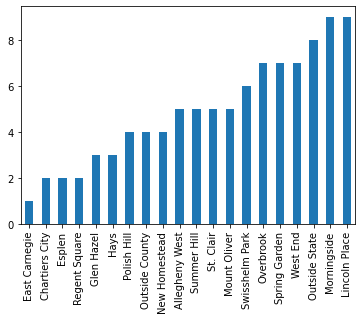

In [145]:
sorted_df['INCIDENTNEIGHBORHOOD'].value_counts(ascending=True).head(20).plot(kind='bar')

Now to clean up the graph by taking the 20 lowest occurance neighborhoods and consider these our best choices.

If we were to plot it the other way, we can see what are the top neighborhoods NOT to be in going strictly by crime rate in the last 30 days.

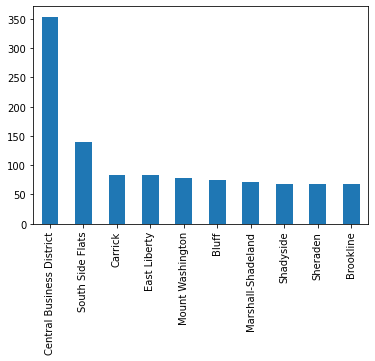

In [146]:
sorted_df['INCIDENTNEIGHBORHOOD'].value_counts(ascending=False).head(10).plot(kind='bar')

In conclusion, over the last 30 days, the neighborhoods with the three highest crime rates are the Central Business District, South Side Flats, and Carrick. Due to this, when comparing to the rest of my group's findings, this will lower these neighborhood's status. The most favorable neighborhoods by this metric would be East Carnegie, Chartiers City, Esplen, and Regent Square. All four of these neighborhoods had less than two crimes committed in the last 30 days, with East Carnegie having an impressive 0.